<a href="https://colab.research.google.com/github/veronica1013/investigating_datasets/blob/main/Investigate_No_Show_Appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigating the No Show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro"> 1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

> This project is about medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The data provided has information from 100k medical appointments done in Brazil.

### 1.1 Problem Statement
> It was noted that 30% of patients miss their scheduled appointments. This led to investigating the reason why that was happening. It is in this view that this project seek to find out what factors are important, for consideration, in order to predict if a patient will show up for their scheduled appointment or not?

### 1.2 Dataset Description 
> **Dataset Details:**
> The dataset for this project was obtained from [kaggle website](https://www.kaggle.com/datasets/joniarroba/noshowappointments) and the link to the dataset is available [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv). More information about the dataset is also found [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub).

> **Column Names and Description Details:**
>* 01 - PatientId: Identification of a patient
>* 02 - AppointmentID: Identification of each appointment
>* 03 - Gender: Male or Female
>* 04 - ScheduledDay: Tells us on what day the patient set up their appointment
>* 05 - AppointmentDay: The day of the actuall appointment, when they have to visit the doctor
>* 06 - Age: How old is the patient
>* 07 - Neighbourhood: Indicates the location of the hospital
>* 08 - Scholarship: Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família
>* 09 - Hipertension: Whether a patient is hypertensive or not
>* 10 - Diabetes: Whether a patient is diabetic or not 
>* 11 - Alcoholism: Whether a patient is alcoholic or not
>* 12 - Handcap: Whether a patient is handicaped or not
>* 13 - SMS_received: 1 or more messages sent to the patient.
>* 14 - No-show: Whether the patient showed up for appointment or not



### 1.3 Question(s) for Analysis
> 1. Find out if there's any relation between the number of females and males that showed up for appointment or not.

> 2. Check if there was any relation between the neighbourhood and no show status.

> 3. Check if the scholarship determined whether patients will show up for appointment or not.

> 4. Check if there's any relation between the number of illness a patient has an effect on whether they'll show up for appointment or not.

### 1.4 **Importing the Necessary Packages**

In [ ]:
# import statements for all of the packages required
# Import pandas for Reading Data
import pandas as pd

# Import Numpy for Numerical Computing
import numpy as np

# Import Seaborn and Matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## 2. Data Wrangling

> In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

<a id='Loading Data'></a>
## Loading the Data
> The dataset was obtained from kaggle and here is the link: https://www.kaggle.com/datasets/joniarroba/noshowappointments?resource=download. I first downloaded the dataset and uploaded it in the workspace. The next thing I'll do is to load it using pandas for further analysis.

In [ ]:
# Load the data using pandas and save it in a variable name df
df = pd.read_csv('KaggleV2-May-2016.csv')

In [ ]:
# Preview the first three rows
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [ ]:
# Check the column names and preview them
column_names = df.columns
print(f'The dataframe df has {len(df.columns)} columns. The names of the columns are as listed below:')
for i in column_names.values:
      print(i)

The dataframe df has 14 columns. The names of the columns are as listed below:
PatientId
AppointmentID
Gender
ScheduledDay
AppointmentDay
Age
Neighbourhood
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS_received
No-show


**Observation**
> From the column names above, it's evident that they are not in the required PEP 8 standards for naming convention. Therefore, during data cleaning process, i'll rename the columns i.e to remove the capital letters, hyphen and introduce underscores for ease of reading names, and also correct the spelling of Hipertension to hypertension.

The next step will be to look at the descriptive statistics of the data. This will help in knowing the measures of central tendency like mean and standard deviation as measures of dispersion among others.

#### Descriptive Statistics

In [ ]:
# Use describe function to determine the measures of central tendency
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


**Observation**
> From the descriptive statistics above, the below issues were noted:
1. There were 27 unique appointment days,
2. There were 81 hospital location,
3. The mean average for age was 37 years
4. The minimum age was -1
5. The oldest patient had 115 years

> The minimum age of -1 doesn't make sense. Therefore this value will be dropped during data cleaning. It was also noted that there were 4 number of handcap. According to the information provided from Kaggle, this column captured those who didn't have any impairedness as 0 and 1, 2, 3 and 4 represented the number of impairdness a patient had.

**Check the size of the dataframe**

In [ ]:
# Check the size of the dataframe
print(f'The dataframe had', df.shape[0], 'rows', 'and', df.shape[1], 'columns.')

The dataframe had 110527 rows and 14 columns.


**Observation**
>Out of the 14 columns, 1 column will be the dependent variable and the rest will be independnt variable. The dependent variable will be the No-show column. This is because we are keen to find out what could be the reasons that lead to 30% of the patients not showing up for their medical appointments.

#### Checking the Datatypes

>Using the info() function, I'll check the data types. This is so beacause we'll have to ensure all the variables data types are in the right format for successful analysis to take place.

In [ ]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Observation**
> From the above information, all the variables have the right data types. There is also no missing values. I'll check if there are any duplicates and outliers.

**Check for Missing values**

In [ ]:
# Check for any missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**Observation**
> There are no missing values

**Check for Duplicates**

In [ ]:
# Check for Duplicates
df.duplicated().sum()

0

**Observation**
> From the above, it is clear that there are no duplicate entries. Next, I'll check if there are any outliers in the dataset.

**Check for Outliers**

In [ ]:
# Checking for outliers
# Create a function for box plot named box_plot

def box_plot(fig):
    sns.boxplot(fig)
    plt.title('Boxplot for Age')
    plt.xlabel('Patients Age')
    plt.show()

**Notes:**
> Using the above function, I'll create a box plot for the age column.

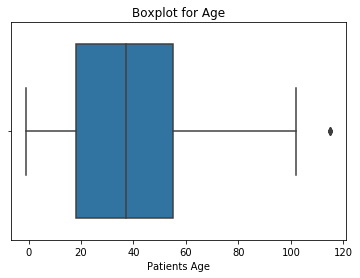

In [ ]:
# Create box plot for age column using the box_plot function above
box_plot(df['Age'])

**Observation**
> After plotting the age column, there's evidence of outliers existence. Before making the decision to drop or retain the outliers in this column, I'll first preview it.

**Preview the Outliers in the age column**

In [ ]:
# Position of the Outlier
print(f'The outlier are at the following position:', np.where(df['Age']>100),
      'as shown in the dataframe below:')
outlier_age = df[df['Age'] > 100]
outlier_age

The outlier are at the following position: (array([58014, 63912, 63915, 68127, 76284, 90372, 97666]),) as shown in the dataframe below:


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


**Observation**
> Having previewed the outlier in the age column, it's noted that it captured patients who were 102 and 115 years. This values are a true reflection of someones age. Therefore, I decided not to drop the outliers.

**Check for unique values in the variables**
> Checking for unique values helps one to know what items there are in each column. Doing this will also help in identifying any unique features that might need cleaning.

In [ ]:
# Checking for unique values
# To make the wordings BOLD = '\033[1m'
# to stop the bold use END = '\033[0m'


# Print the unique variables for each column
for i, m in df.items():
    print(f'\033[1mBelow are the unique variables for', i, ':\033[0m\n', m.unique(), '\n')

Below are the unique variables for PatientId :
 [  2.98724998e+13   5.58997777e+14   4.26296230e+12 ...,   7.26331493e+13
   9.96997666e+14   1.55766317e+13] 

Below are the unique variables for AppointmentID :
 [5642903 5642503 5642549 ..., 5630692 5630323 5629448] 

Below are the unique variables for Gender :
 ['F' 'M'] 

Below are the unique variables for ScheduledDay :
 ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...,
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z'] 

Below are the unique variables for AppointmentDay :
 ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '

**Observation**
> The zero's and one's in the Scholarship, Hipertension, Alcoholism, Diabetes, SMS_received and handcap represent yes or no. That means either a patient has a particular disease or not. that is 1 for yes and 0 for no.

> However, in the No-show column, the No mean that the patient was present for the appointment but the yes stand for those patients who did not go for the appointment.

To understand more about the data, I'll check for its distribution. This will help in determining whether there's positive or negative skewness in the data.

**Plotting the Histogram:**
> It is important to see how the variables are distributed. Therefore, I'll plot a histogram.**

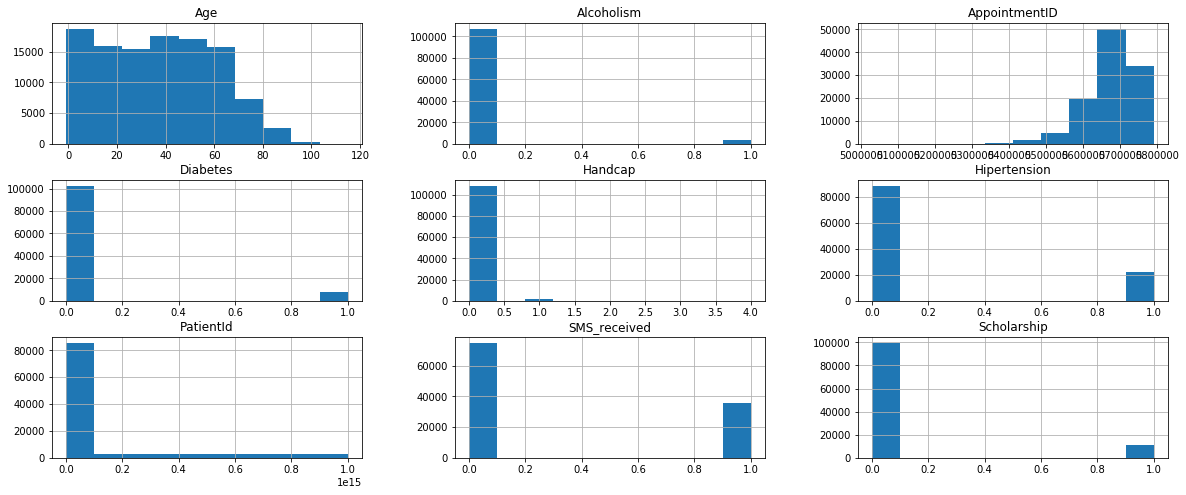

In [ ]:
# Plot a histogram
df.hist(figsize=(20,8));

**Observation**
> The age column had a positive skew while the Patient ID column was negatively skewed.

**Check for Relationships between the variables**
> Plotting Scatter Plot

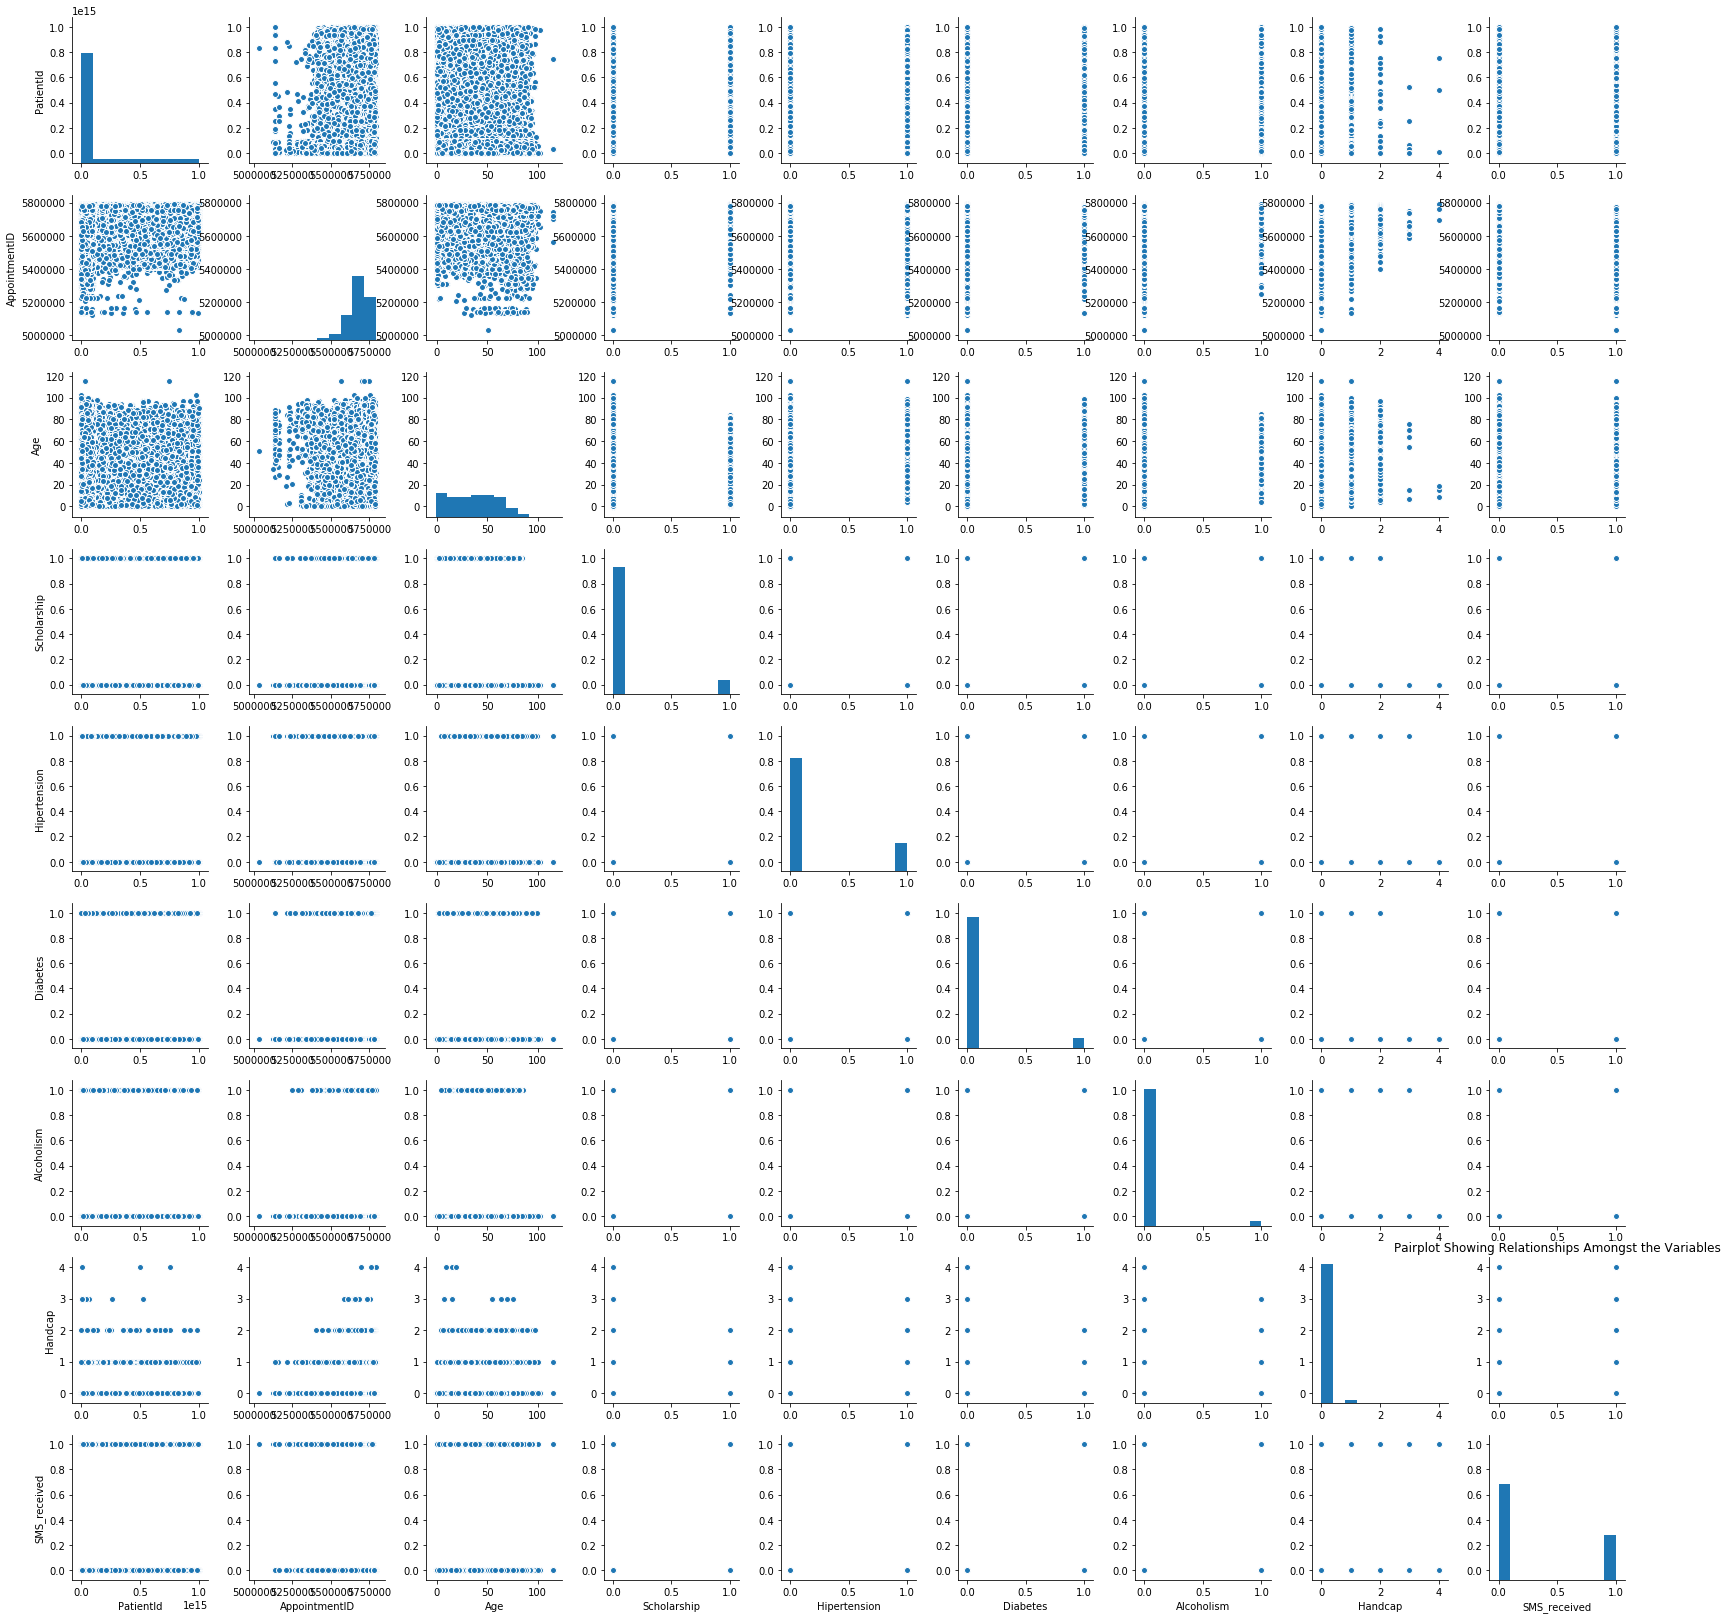

In [ ]:
# Plot scatter plot using the pairplot from seaborn package

sns.pairplot(df)
plt.title('Pairplot Showing Relationships Amongst the Variables');

**Observation**
> From the above pairplot, it is evident that there's no positive or negative correlation amongst the variables. 

#### Notes from Previewing Data

**Below were noted during data understanding process:**

> The data appeared to be quite clean apart from a few places that need attention. Such as:
1. Renaming columns
2. Dropping the -1 as age


### Data Cleaning
> The data cleaning process will entail renaming of the columns and dropping the value of age that was -1.

In [ ]:
# Rename Columns
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day',
              'appointment_day', 'age', 'neighbourhood', 'scholarship',
              'hypertension','diabetes', 'alcoholism', 'handcap',
              'sms_received', 'no_show']

df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

In [ ]:
# preview a few rows to see if the change has been effected.
df.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


**Observation**
> The renaming of columns has been effected successfully. Next, I'll drop the row which has age as -1. but before then, I'll save a copy of the original data frame so that i could continue working on the copy.

**Making a Copy of the Oringinal DataFrame**

In [ ]:
df_copy = df.copy(deep=True)
df_copy.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Before doing further analysis, there are a few additions I'll do on the data. One is to create a new columns that shows the patients who had more than one illness. Next, I'll group the age column to different age groups and see if there are any insights with whether it affected whether a patient showed up for appointment or not.

### Feature Engineering

#### 1. Add a new column that shows patients with number of illness

In [ ]:
df_copy['number_of_illness'] = df_copy['hypertension'] + df_copy['alcoholism'] + df_copy['handcap']
df_copy.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,number_of_illness
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


#### 2. Encode the age column

In [ ]:
# Define a function that we'll create a new column age group
# Make a copy of the data frame that the age group column will be created
df_copy2 = df_copy.copy(deep=True) 

# Create the age group function
def age_group_fn(new_column):
    bins= [0,2,4,13,20,110]
    labels = ['Infant','Toddler','Kid','Teen','Adult']
    df_copy2['age_group'] = pd.cut(df_copy2['age'], bins=bins, labels=labels, right=False)
    return df_copy2

In [ ]:
# Confirm if the function is working well
age_group_fn('age_group')[0:5] # Preview the first five items on the new column

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,number_of_illness,age_group
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,Adult
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Adult
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Adult
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Kid
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,Adult


In [ ]:
# Preview a few rows to see if the age group is in the data frame
df_copy2.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,number_of_illness,age_group
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,Adult
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Adult


**Preview the first 2 rows of the entire dataframe to see if the changes are effected**

#### 3. Drop the row with age as -1

In [ ]:
# Check the index where age is -1
df_copy2[df_copy2['age'] ==-1]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,number_of_illness,age_group
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No,0,NaN


**Observation**
> Having noted that the age of -1 is index 99832, that's the index value I'll use to drop the row.

In [ ]:
# Drop the row with age as -1 using the index
df_copy2.drop([99832], axis=0, inplace=True)


In [ ]:
# Confirm if changes has been effected

for f in df_copy['age']:
    if f == -1:
        print('True')
    else:
        print(f'The value -1 is not in the age column. It was dropped successfully.')
    break
    
#df_copy2[df_copy2['age'] == -1]

The value -1 is not in the age column. It was dropped successfully.


**Notes:**
> After completing making the necessary changes, I'll start exploring the data by performing exploratory data analysis.

<a id='eda'></a>
## 3. Exploratory Data Analysis

### Research Question 1:
#### 1. Is there's any relation between the number of females and males that showed up for appointment or not?

In [ ]:
# Check the counts for no show
pd.DataFrame(df_copy2['no_show'].value_counts())

,no_show
No,88207
Yes,22319


**Observation**
> From the above, it is noted that many patients showed up for the appointment with a value of 88208 out of 110527 patients. Only 22319 did not show up for the appointment. I'll perform further analysis to fing out why that is so. Below is a bar graph visualization the number of patients that showed up vs those that didn't show up for the appointment.

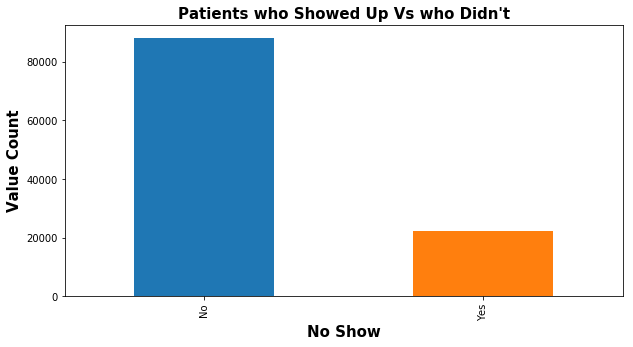

In [ ]:
# bar graph for Patients who showed up and those that didn't
df_copy2['no_show'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Patients who Showed Up Vs who Didn't", fontsize=15, weight='bold')
plt.xlabel('No Show', fontsize=15, weight='bold')
plt.ylabel('Value Count', fontsize=15, weight='bold');

> I'll further look at if there is any relation between the number of females or males who showed up for the appointment or not. To do this, I'll first groupby gender and no show column.

**Groupby Gender and No show column**

In [ ]:
df_copy2.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show', 'number_of_illness', 'age_group'],
      dtype='object')

In [ ]:
# Create a Groupby Function
def group_by1(data_2a, itema, itemb):
    data_2a = pd.DataFrame(df_copy2.groupby([itema])[itemb].value_counts())
    return data_2a

In [ ]:
# Use the group_by1 function above to get the value counts
# Define the data_2a
data_2a = df_copy2.copy()
group_by1(data_2a, 'gender', 'no_show')

no_show
gender no_show         
F      No         57245
       Yes        14594
M      No         30962
       Yes         7725

**Observation**
> From the above, it's noted that there were many females who showed up for the appointment compared to males. A total of 57246 females appeared for treatment vs 30962 males while 14594 females and 7725 males didn't show up.

> The results are plotted in a bar graph below for better visualization.

**Create a Bar Plot Function**

In [ ]:
# Create a bar plot function
def bar_plot(df_1, val1, val2):
    colors = [['blue', 'red', 'green', 'orange']]
    df_1 = pd.DataFrame(df_copy2.groupby([val1])[val2].value_counts(ascending=True)).head(20).plot(kind='bar',color=colors, figsize=(20,8))
    plt.title(f"Relationship between {val1.title()} and {val2.title()}", fontsize=15, weight='bold')
    plt.xlabel(val1.title().replace("_"," "), fontsize = 15, weight = "bold")
    plt.ylabel(val2.title(), fontsize = 15, weight = "bold")
    plt.show()

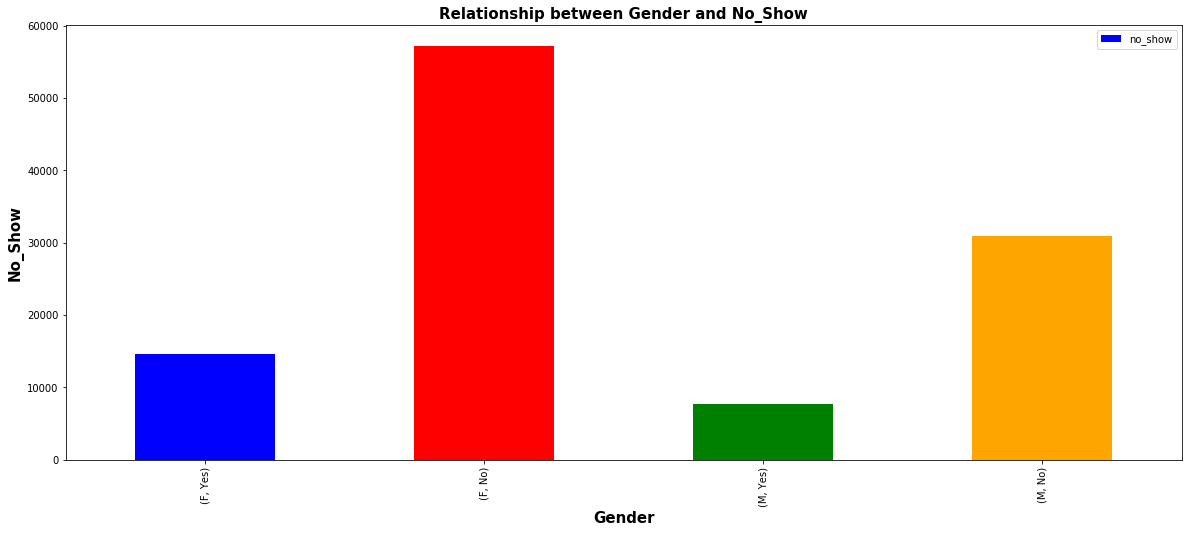

In [ ]:
# # Barplot for the value counts for gender and no show
df_1 = df_copy2.copy()
bar_plot(df_1, 'gender', 'no_show')

In [ ]:
# Preview the dataframe for male gender who didn't show up 
male_didnt_show_up = df_copy[(df_copy['gender']== 'M') & (df_copy['no_show']== 'Yes')]
male_didnt_show_up

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,number_of_illness
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,0
22,8.632298e+14,5616091,M,2016-04-25T13:29:16Z,2016-04-29T00:00:00Z,13,CONQUISTA,0,0,0,0,0,1,Yes,0
31,3.112849e+11,5628907,M,2016-04-27T12:07:14Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,1,0,0,0,0,0,Yes,0
56,4.751189e+14,5600005,M,2016-04-19T09:47:43Z,2016-04-29T00:00:00Z,12,NOVA PALESTINA,0,0,0,0,0,1,Yes,0
76,6.549277e+12,5597643,M,2016-04-18T17:40:18Z,2016-04-29T00:00:00Z,28,ANTÔNIO HONÓRIO,0,0,0,0,0,0,Yes,0
79,9.912882e+13,5597673,M,2016-04-18T17:53:25Z,2016-04-29T00:00:00Z,67,MARIA ORTIZ,0,0,0,0,0,1,Yes,0
90,8.782530e+14,5595362,M,2016-04-18T12:33:05Z,2016-04-29T00:00:00Z,11,JUCUTUQUARA,0,0,0,0,0,1,Yes,0
131,4.755938e+13,5637150,M,2016-04-28T17:38:06Z,2016-04-29T00:00:00Z,29,PRAIA DO SUÁ,0,0,0,1,0,0,Yes,1
132,8.468587e+14,5560742,M,2016-04-08T09:29:23Z,2016-04-29T00:00:00Z,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes,0
135,7.611590e+12,5560758,M,2016-04-08T09:30:58Z,2016-04-29T00:00:00Z,30,PRAIA DO SUÁ,0,0,0,0,0,1,Yes,0


In [ ]:
# Preview the dataframe for the male gender who showed up
male_showed_up = df_copy[(df_copy['gender']== 'M') & (df_copy['no_show']== 'No')]
male_showed_up

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,number_of_illness
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
13,9.113946e+14,5636249,M,2016-04-28T14:52:07Z,2016-04-29T00:00:00Z,28,NOVA PALESTINA,0,0,0,0,0,0,No,0
16,8.457439e+13,5633121,M,2016-04-28T08:51:47Z,2016-04-29T00:00:00Z,50,NOVA PALESTINA,0,0,0,0,0,0,No,0
25,5.819370e+12,5624020,M,2016-04-26T15:04:17Z,2016-04-29T00:00:00Z,46,CONQUISTA,0,1,0,0,0,1,No,1
28,5.926172e+12,5642400,M,2016-04-29T15:48:02Z,2016-04-29T00:00:00Z,51,SÃO PEDRO,0,0,0,0,0,0,No,0
32,5.288356e+13,5637908,M,2016-04-29T07:30:27Z,2016-04-29T00:00:00Z,61,SÃO CRISTÓVÃO,0,1,0,0,0,0,No,1
35,7.816264e+13,5637968,M,2016-04-29T07:34:42Z,2016-04-29T00:00:00Z,18,SÃO CRISTÓVÃO,0,0,0,0,0,0,No,0
38,5.873316e+12,5609446,M,2016-04-20T15:54:18Z,2016-04-29T00:00:00Z,85,SÃO CRISTÓVÃO,0,1,0,0,0,1,No,1
46,1.379437e+11,5615608,M,2016-04-25T12:44:36Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,1,0,1,0,1,No,2
53,4.438587e+14,5637909,M,2016-04-29T07:30:31Z,2016-04-29T00:00:00Z,6,CONQUISTA,0,0,0,0,0,0,No,0


In [ ]:
# # Preview the dataframe for female gender who didn't show up
female_didnt_show_up = df_copy[(df_copy['gender']== 'F') & (df_copy['no_show']== 'Yes')]
female_didnt_show_up

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,number_of_illness
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,0
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,0
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes,0
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,0
21,1.215484e+13,5628338,F,2016-04-27T10:50:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,Yes,0
44,2.741649e+11,5635414,F,2016-04-28T13:27:27Z,2016-04-29T00:00:00Z,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,1
48,8.545415e+12,5618643,F,2016-04-26T07:19:49Z,2016-04-29T00:00:00Z,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes,0
49,9.223559e+13,5534656,F,2016-03-31T17:11:17Z,2016-04-29T00:00:00Z,27,GRANDE VITÓRIA,0,0,0,0,0,1,Yes,0
50,1.827172e+14,5534661,F,2016-03-31T17:12:45Z,2016-04-29T00:00:00Z,19,GRANDE VITÓRIA,0,0,0,0,0,1,Yes,0
51,4.694699e+13,5534635,F,2016-03-31T17:05:31Z,2016-04-29T00:00:00Z,23,GRANDE VITÓRIA,1,0,0,0,0,1,Yes,0


In [ ]:
# # Preview the dataframe for female gender who showed up
female_showed_up = df_copy[(df_copy['gender']== 'F') & (df_copy['no_show']== 'No')]
female_showed_up

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,number_of_illness
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,1
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,0
10,7.345362e+14,5630213,F,2016-04-27T14:58:11Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,No,0
12,5.666548e+14,5634718,F,2016-04-28T11:33:51Z,2016-04-29T00:00:00Z,22,NOVA PALESTINA,1,0,0,0,0,0,No,0
14,9.988472e+13,5633951,F,2016-04-28T10:06:24Z,2016-04-29T00:00:00Z,54,NOVA PALESTINA,0,0,0,0,0,0,No,0


### Research Question 2.
#### 2. Is there any relation between the neighbourhood and no show status?

> Checking the value count for the neighboured will show which neigboured had the highest number of hospitals.

In [ ]:
# Check the value counts for the number of hospitals per location
pd.DataFrame(df_copy['neighbourhood'].value_counts())


,neighbourhood
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4431
JARDIM DA PENHA,3877
ITARARÉ,3514
CENTRO,3334
TABUAZEIRO,3132
SANTA MARTHA,3131
JESUS DE NAZARETH,2853
BONFIM,2773


**Observation**
> It's noted the top five neighbourhood with the highest number of hospitals are:
* JARDIM CAMBURI -                7717
* MARIA ORTIZ -                   5805
* RESISTÊNCIA -                   4431
* JARDIM DA PENHA -               3877
* ITARARÉ -                       3514

I'll also checked for the relation between appointment day, neighbourhood and no show status. Below value count shows the results:

In [ ]:
# Create a Groupby Function that groups two variables
def group_by2(data, item1, item2, item3):
    data = pd.DataFrame(df_copy2.groupby([item1, item2])[item3].value_counts())
    return data
    

In [ ]:
# Use the group_by function to group the appointment day and no show
# Get the value count for No show
data = df_copy2.copy()
group_by2(data, 'appointment_day', 'neighbourhood', 'no_show')

no_show
appointment_day      neighbourhood       no_show         
2016-04-29T00:00:00Z ANDORINHAS          No            68
                                         Yes           15
                     ANTÔNIO HONÓRIO     Yes            4
                     ARIOVALDO FAVALESSA No             7
                                         Yes            1
                     BARRO VERMELHO      No             6
                                         Yes            1
                     BELA VISTA          No            41
                                         Yes           10
                     BENTO FERREIRA      No            22
                                         Yes            8
                     BOA VISTA           No             9
                     BONFIM              No            67
                                         Yes           12
                     CARATOÍRA           No            68
                                         Yes           21
                     CENTRO              No            89
                                         Yes           20
                     COMDUSA             No             7
                                         Yes            2
                     CONQUISTA           No            27
                                         Yes            6
                     CONSOLAÇÃO          No            38
                                         Yes            9
                     CRUZAMENTO          No            39
                                         Yes           13
                     DA PENHA            No            34
                                         Yes            5
                     DE LOURDES          No             8
                                         Yes            1
...                                                   ...
2016-06-08T00:00:00Z SANTA LÚCIA         Yes            4
                     SANTA MARTHA        No           139
                                         Yes           22
                     SANTA TEREZA        No            43
                                         Yes            8
                     SANTO ANDRÉ         No            98
                                         Yes            8
                     SANTO ANTÔNIO       No           124
                                         Yes           22
                     SANTOS DUMONT       No            27
                                         Yes           12
                     SANTOS REIS         No            28
                                         Yes            4
                     SEGURANÇA DO LAR    No             5
                                         Yes            1
                     SOLON BORGES        No             9
                                         Yes            2
                     SÃO BENEDITO        No            46
                                         Yes           12
                     SÃO CRISTÓVÃO       No            50
                                         Yes           10
                     SÃO JOSÉ            No            61
                                         Yes           16
                     SÃO PEDRO           No            90
                                         Yes           14
                     TABUAZEIRO          No            86
                                         Yes           27
                     UNIVERSITÁRIO       No             6
                     VILA RUBIM          No            20
                                         Yes            4

[3872 rows x 1 columns]

In [ ]:
df_copy2.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show', 'number_of_illness', 'age_group'],
      dtype='object')

In [ ]:
# Use the group_by1 function above to group the neighbourhood
# get the value count for no show
group_by1(data_2a, 'neighbourhood', 'no_show')

no_show
neighbourhood       no_show         
AEROPORTO           No             7
                    Yes            1
ANDORINHAS          No          1741
                    Yes          521
ANTÔNIO HONÓRIO     No           221
                    Yes           50
ARIOVALDO FAVALESSA No           220
                    Yes           62
BARRO VERMELHO      No           332
                    Yes           91
BELA VISTA          No          1523
                    Yes          384
BENTO FERREIRA      No           665
                    Yes          193
BOA VISTA           No           254
                    Yes           58
BONFIM              No          2223
                    Yes          550
CARATOÍRA           No          1974
                    Yes          591
CENTRO              No          2631
                    Yes          703
COMDUSA             No           254
                    Yes           56
CONQUISTA           No           689
                    Yes          160
CONSOLAÇÃO          No          1139
                    Yes          237
CRUZAMENTO          No          1094
                    Yes          304
...                              ...
SANTA MARTHA        No          2635
                    Yes          496
SANTA TEREZA        No          1060
                    Yes          272
SANTO ANDRÉ         No          2063
                    Yes          508
SANTO ANTÔNIO       No          2262
                    Yes          484
SANTOS DUMONT       No           907
                    Yes          369
SANTOS REIS         No           435
                    Yes          112
SEGURANÇA DO LAR    No           117
                    Yes           28
SOLON BORGES        No           400
                    Yes           69
SÃO BENEDITO        No          1152
                    Yes          287
SÃO CRISTÓVÃO       No          1473
                    Yes          363
SÃO JOSÉ            No          1549
                    Yes          428
SÃO PEDRO           No          1933
                    Yes          515
TABUAZEIRO          No          2559
                    Yes          573
UNIVERSITÁRIO       No           120
                    Yes           32
VILA RUBIM          No           710
                    Yes          141

[160 rows x 1 columns]

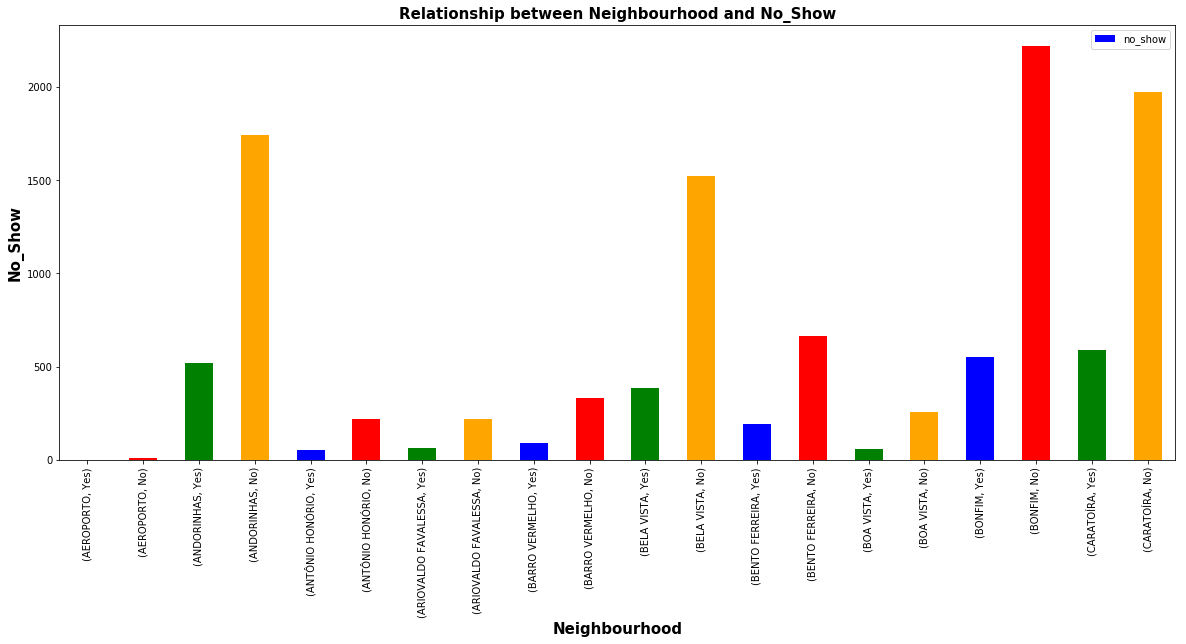

In [ ]:
# Bar plot for the neighbourhoodr and no show
bar_plot(df_1, 'neighbourhood', 'no_show')

### Research Question 3.
#### 3. Does the scholarship determine whether patients will show up for appointment or not?

> A value count will display the number of patients who showed up for appointment vs those who didn't. Below is a value between the two variables:

In [ ]:
# Value count for scholarship and no show using the group_by1 function
group_by1(data_2a, 'scholarship', 'no_show')

no_show
scholarship no_show         
0           No         79924
            Yes        19741
1           No          8283
            Yes         2578

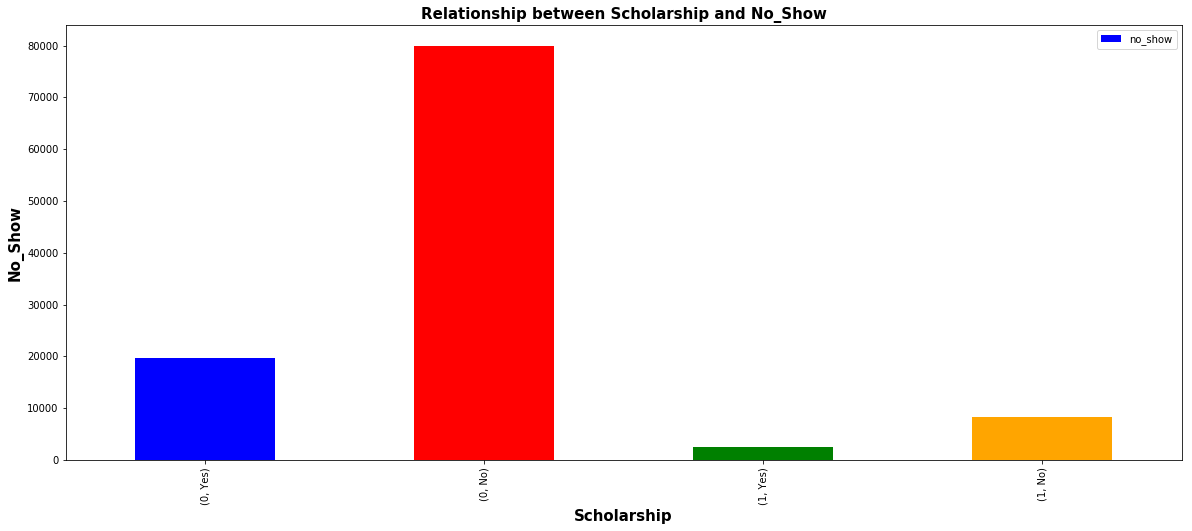

In [ ]:
# Bar plot for those who received scholarship and no show
bar_plot(df_1, 'scholarship', 'no_show')

**Observation**
> Majority of the patients who showed up for appoint had not received scholarship.79925 patients visited the hospital for their appoint against 19741 who didn't show up. Out of those whho received scholarship, 8283 of them showed up for the appointment while 2578 did not.

In [ ]:
# Value count for those who received sms and no show using group_by1 function
group_by1(data_2a, 'sms_received', 'no_show')

no_show
sms_received no_show         
0            No         62509
             Yes        12535
1            No         25698
             Yes         9784

**Observation**
> Majority of the patients appeared for treatment whether they received a message or not.

> A bar chart of the same is displayed below:

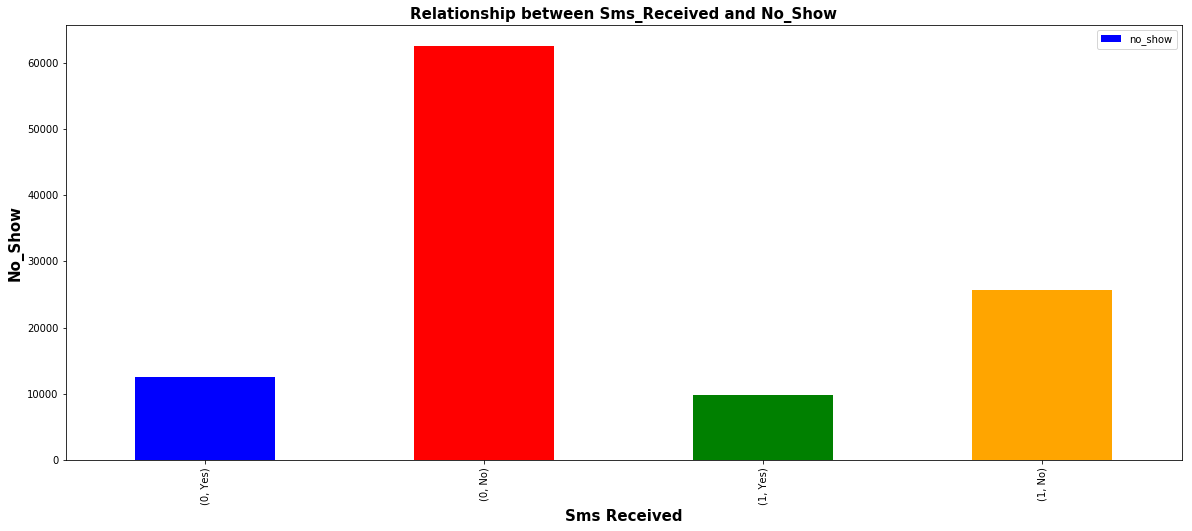

In [ ]:
# Bar plot for the patients who received sms and no show
bar_plot(df_1, 'sms_received', 'no_show')

### Research Question 4.
#### 4. Is there's any relation between the number of illness a patient has and whether they'll show up for appointment or not.

> Checking on the number of illness per the status of no show will help in seeing if there's any relation amongst the two variables.

In [ ]:
# Value count for the number of illness and no show using the group_by1 function
group_by1(data_2a, 'number_of_illness', 'no_show')

no_show
number_of_illness no_show         
0                 No         67579
                  Yes        17876
1                 No         18653
                  Yes         4019
2                 No          1868
                  Yes          392
3                 No            99
                  Yes           29
4                 No             8
                  Yes            3

**Observation**
> From the above results, it's noted that only a few of the patients who had the most number of illness showed up for appointment compared to those who had no other illness. The bar graph below displays the results:

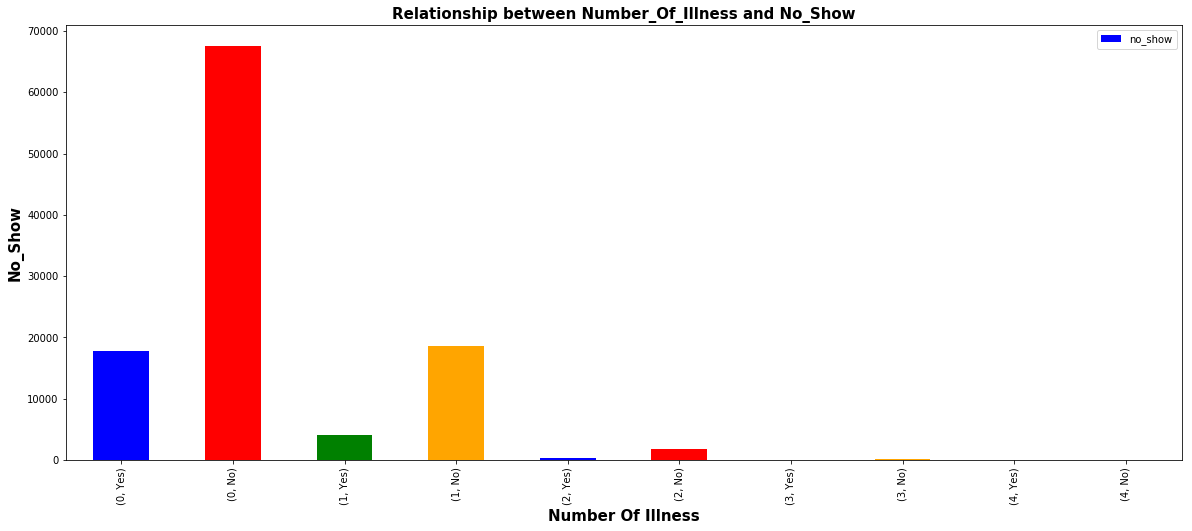

In [ ]:
# # Bar plot for the number of illness and no show
bar_plot(df_1, 'number_of_illness', 'no_show')

> Looking at the relation between Diabetes and Now show appointment.

In [ ]:
# Value count for diabetes and no show using the group_by1 function
group_by1(data_2a, 'diabetes', 'no_show')

no_show
diabetes no_show         
0        No         81694
         Yes        20889
1        No          6513
         Yes         1430

**Observation**
> It's noted that many of the patients who showed up for the appointment did not have diabetes. 81695 of the showed up for appointment while 20889 did not show up for appointment.

. Below is a bar gragh for the same:

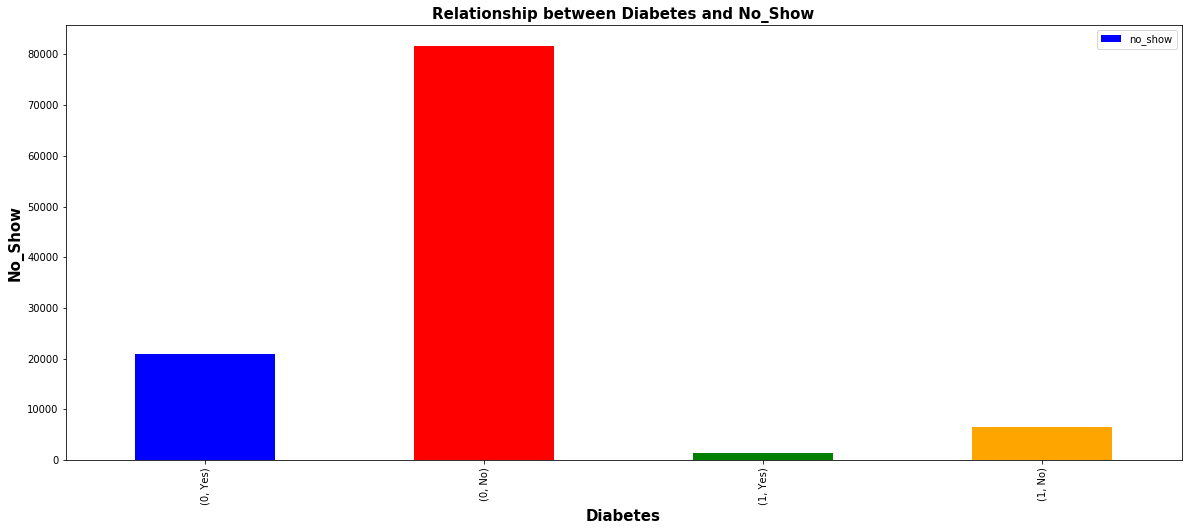

In [ ]:
# # Bar plot for diabetes and no show
bar_plot(df_1, 'diabetes', 'no_show')

> Next I'll look at if there's any relation between Hypertension and no show status:

In [ ]:
# value count for hypertension and no show using group_by1 function
group_by1(data_2a, 'hypertension', 'no_show')

no_show
hypertension no_show         
0            No         70178
             Yes        18547
1            No         18029
             Yes         3772

**Observation**
> From the above output, majority of the patients who showed up for the appointment didn't have hypertension. 70179 of them showed up while 18547 didn't show up.

> Similarly, from those who had hypertension, majority showed up for their appointments. the value was 18029 vs 3772 who didn't show up for the appointments.

> Below is a bar chart for the same:

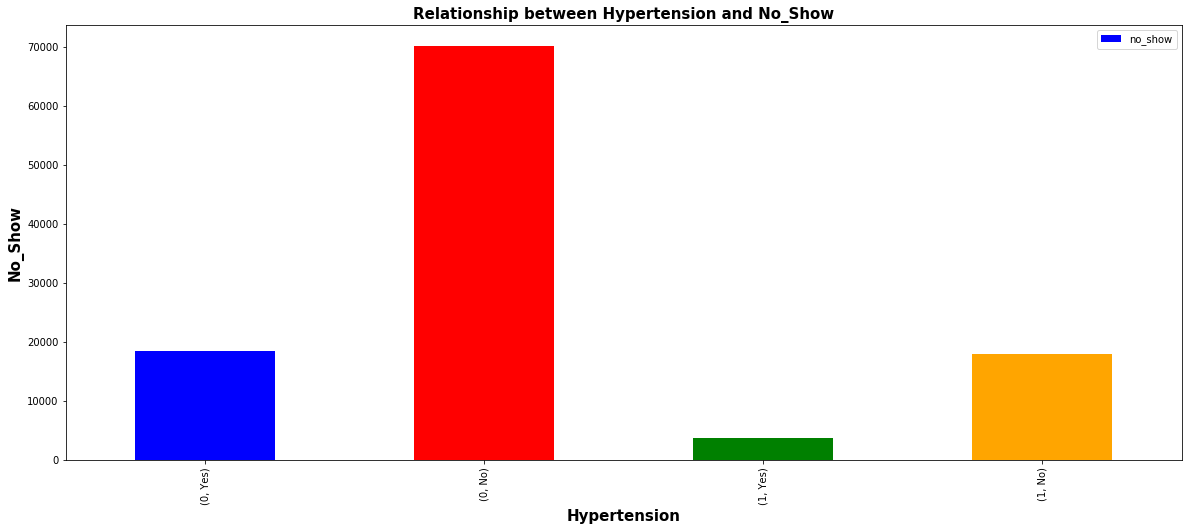

In [ ]:
# # Bar plot for hypertension and no show
bar_plot(df_1, 'hypertension', 'no_show')

In [ ]:
# Value count for Handcap and no show using the group_by1 function
group_by1(data_2a, 'handcap', 'no_show')

no_show
handcap no_show         
0       No         86373
        Yes        21912
1       No          1676
        Yes          366
2       No           146
        Yes           37
3       No            10
        Yes            3
4       No             2
        Yes            1

**Observation**
> It's evident that most of the patient's visited the hospital. Majority of those who had handcap as condition still visited the hospital.

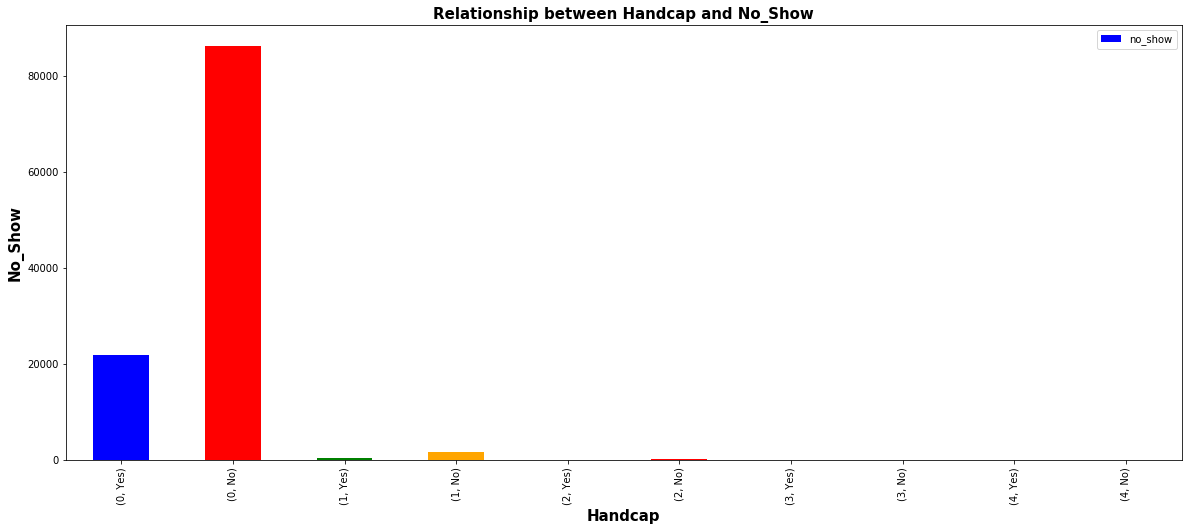

In [ ]:
# # Bar plot for handcap and no show
bar_plot(df_1, 'handcap', 'no_show')

In [ ]:
# Create value count for age group and no show using group_by1 function
group_by1(data_2a, 'age_group', 'no_show')

no_show
age_group no_show         
Infant    No          4758
          Yes         1054
Toddler   No          2602
          Yes          529
Kid       No          9369
          Yes         2724
Teen      No          6941
          Yes         2434
Adult     No         64535
          Yes        15575

In [ ]:
# Get value count for appointment day, neigbourhood and no show using the group_by2 function
group_by2(data, 'appointment_day', 'neighbourhood', 'no_show')

no_show
appointment_day      neighbourhood       no_show         
2016-04-29T00:00:00Z ANDORINHAS          No            68
                                         Yes           15
                     ANTÔNIO HONÓRIO     Yes            4
                     ARIOVALDO FAVALESSA No             7
                                         Yes            1
                     BARRO VERMELHO      No             6
                                         Yes            1
                     BELA VISTA          No            41
                                         Yes           10
                     BENTO FERREIRA      No            22
                                         Yes            8
                     BOA VISTA           No             9
                     BONFIM              No            67
                                         Yes           12
                     CARATOÍRA           No            68
                                         Yes           21
                     CENTRO              No            89
                                         Yes           20
                     COMDUSA             No             7
                                         Yes            2
                     CONQUISTA           No            27
                                         Yes            6
                     CONSOLAÇÃO          No            38
                                         Yes            9
                     CRUZAMENTO          No            39
                                         Yes           13
                     DA PENHA            No            34
                                         Yes            5
                     DE LOURDES          No             8
                                         Yes            1
...                                                   ...
2016-06-08T00:00:00Z SANTA LÚCIA         Yes            4
                     SANTA MARTHA        No           139
                                         Yes           22
                     SANTA TEREZA        No            43
                                         Yes            8
                     SANTO ANDRÉ         No            98
                                         Yes            8
                     SANTO ANTÔNIO       No           124
                                         Yes           22
                     SANTOS DUMONT       No            27
                                         Yes           12
                     SANTOS REIS         No            28
                                         Yes            4
                     SEGURANÇA DO LAR    No             5
                                         Yes            1
                     SOLON BORGES        No             9
                                         Yes            2
                     SÃO BENEDITO        No            46
                                         Yes           12
                     SÃO CRISTÓVÃO       No            50
                                         Yes           10
                     SÃO JOSÉ            No            61
                                         Yes           16
                     SÃO PEDRO           No            90
                                         Yes           14
                     TABUAZEIRO          No            86
                                         Yes           27
                     UNIVERSITÁRIO       No             6
                     VILA RUBIM          No            20
                                         Yes            4

[3872 rows x 1 columns]

In [ ]:
# Get value count for age group, scholarship and no show using the group_by2 function
group_by2(data, 'age_group', 'scholarship', 'no_show')

no_show
age_group scholarship no_show         
Infant    0           No          4643
                      Yes         1035
          1           No           115
                      Yes           19
Toddler   0           No          2386
                      Yes          490
          1           No           216
                      Yes           39
Kid       0           No          8079
                      Yes         2317
          1           No          1290
                      Yes          407
Teen      0           No          5995
                      Yes         2060
          1           No           946
                      Yes          374
Adult     0           No         58819
                      Yes        13836
          1           No          5716
                      Yes         1739

**Observation**
> Most patients despite their age groups visited the hospital whether the had scholarship or not.

In [ ]:
# Get value count for age_group, number_of_illness and no show using the group_by2 function
group_by2(data, 'age_group','number_of_illness', 'no_show')

no_show
age_group number_of_illness no_show         
Infant    0                 No          4756
                            Yes         1054
          1                 No             2
Toddler   0                 No          2601
                            Yes          529
          1                 No             1
Kid       0                 No          9298
                            Yes         2675
          1                 No            54
                            Yes           44
          2                 No            16
                            Yes            3
          3                 No             1
                            Yes            1
          4                 Yes            1
Teen      0                 No          6753
                            Yes         2379
          1                 No           162
                            Yes           53
          2                 No            23
                            Yes            1
          3                 No             1
                            Yes            1
          4                 No             2
Adult     0                 No         44171
                            Yes        11239
          1                 No         18432
                            Yes         3919
          2                 No          1829
                            Yes          388
          3                 No            97
                            Yes           27
          4                 No             6
                            Yes            2

In [ ]:
# Create a bar plot function
def bar_plot_(df_1, val1, val2):
    colors = [['blue', 'red', 'green', 'orange']]
    df_1 = pd.DataFrame(df_copy2.groupby([val1])[val2].value_counts(ascending=True)).head(20).plot(kind='bar',color=colors, figsize=(20,8))
    plt.title(f"Relationship between {val1} and {val2}", fontsize=15, weight='bold')
    plt.xlabel(val1.title(), fontsize = 15, weight = "bold")
    plt.ylabel(val2.title(), fontsize = 15, weight = "bold")
    plt.show()

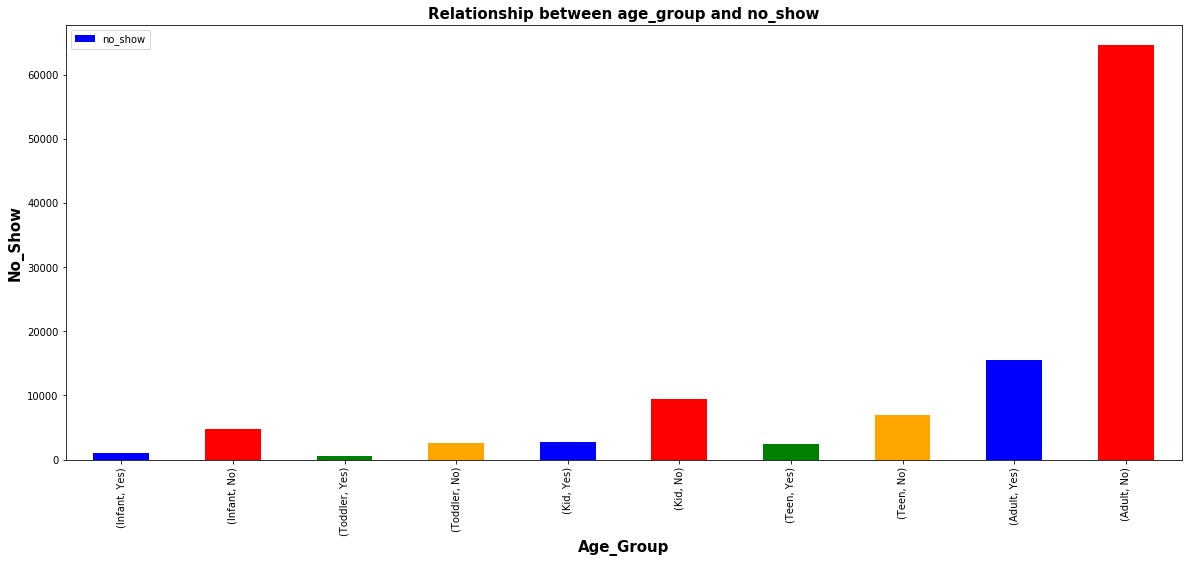

In [ ]:
# Bar Graph for Age Group Vs No Show using the bar_plot_ function
bar_plot_(df_1, 'age_group', 'no_show')

In [ ]:
# Total value count for each age group
pd.DataFrame(df_copy2['age_group'].value_counts())

,age_group
Adult,80110
Kid,12093
Teen,9375
Infant,5812
Toddler,3131


**Observation**
> From the entire age group, adults visited the hospital the most with a count of 64535 out a total figure of 80110.

In [ ]:
# Value count for age group, appointment day and no show
group_by2(data, 'age_group','appointment_day', 'no_show')

no_show
age_group appointment_day      no_show         
Infant    2016-04-29T00:00:00Z No           161
                               Yes           43
          2016-05-02T00:00:00Z No           227
                               Yes           49
          2016-05-03T00:00:00Z No           161
                               Yes           35
          2016-05-04T00:00:00Z No           155
                               Yes           52
          2016-05-05T00:00:00Z No           196
                               Yes           46
          2016-05-06T00:00:00Z No           139
                               Yes           33
          2016-05-09T00:00:00Z No           202
                               Yes           71
          2016-05-10T00:00:00Z No           163
                               Yes           46
          2016-05-11T00:00:00Z No           168
                               Yes           45
          2016-05-12T00:00:00Z No           215
                               Yes           29
          2016-05-13T00:00:00Z No           168
                               Yes           31
          2016-05-16T00:00:00Z No           241
                               Yes           60
          2016-05-17T00:00:00Z No           179
                               Yes           45
          2016-05-18T00:00:00Z No           192
                               Yes           54
          2016-05-19T00:00:00Z No           205
                               Yes           52
...                                         ...
Adult     2016-05-16T00:00:00Z No          2541
                               Yes          752
          2016-05-17T00:00:00Z No          2539
                               Yes          653
          2016-05-18T00:00:00Z No          2544
                               Yes          608
          2016-05-19T00:00:00Z No          2430
                               Yes          609
          2016-05-20T00:00:00Z No          2124
                               Yes          603
          2016-05-24T00:00:00Z No          2352
                               Yes          627
          2016-05-25T00:00:00Z No          2315
                               Yes          526
          2016-05-30T00:00:00Z No          2672
                               Yes          639
          2016-05-31T00:00:00Z No          2620
                               Yes          557
          2016-06-01T00:00:00Z No          2726
                               Yes          570
          2016-06-02T00:00:00Z No          2628
                               Yes          565
          2016-06-03T00:00:00Z No          2424
                               Yes          567
          2016-06-06T00:00:00Z No          2741
                               Yes          619
          2016-06-07T00:00:00Z No          2618
                               Yes          565
          2016-06-08T00:00:00Z No          2740
                               Yes          523

[263 rows x 1 columns]

In [ ]:
group_by2(data, 'appointment_day','scholarship', 'no_show')

no_show
appointment_day      scholarship no_show         
2016-04-29T00:00:00Z 0           No          2360
                                 Yes          555
                     1           No           242
                                 Yes           78
2016-05-02T00:00:00Z 0           No          3201
                                 Yes          759
                     1           No           314
                                 Yes          102
2016-05-03T00:00:00Z 0           No          3070
                                 Yes          718
                     1           No           355
                                 Yes          113
2016-05-04T00:00:00Z 0           No          2890
                                 Yes          868
                     1           No           305
                                 Yes          105
2016-05-05T00:00:00Z 0           No          3098
                                 Yes          728
                     1           No           368
                                 Yes           79
2016-05-06T00:00:00Z 0           No          2806
                                 Yes          696
                     1           No           278
                                 Yes           99
2016-05-09T00:00:00Z 0           No          3207
                                 Yes          910
                     1           No           294
                                 Yes          109
2016-05-10T00:00:00Z 0           No          2990
                                 Yes          882
...                                           ...
2016-05-30T00:00:00Z 1           No           375
                                 Yes          107
2016-05-31T00:00:00Z 0           No          3174
                                 Yes          671
                     1           No           338
                                 Yes           96
2016-06-01T00:00:00Z 0           No          3326
                                 Yes          705
                     1           No           326
                                 Yes          107
2016-06-02T00:00:00Z 0           No          3185
                                 Yes          727
                     1           No           323
                                 Yes           75
2016-06-03T00:00:00Z 0           No          2968
                                 Yes          719
                     1           No           317
                                 Yes           86
2016-06-06T00:00:00Z 0           No          3451
                                 Yes          782
                     1           No           367
                                 Yes           91
2016-06-07T00:00:00Z 0           No          3282
                                 Yes          723
                     1           No           318
                                 Yes           93
2016-06-08T00:00:00Z 0           No          3331
                                 Yes          690
                     1           No           374
                                 Yes           84

[107 rows x 1 columns]

**Observation**
> Most of the patients who showed up for appointment had not received any scholarship. However, a significant number that received the scholarship showed up for the appointment. 

<a id='conclusions'></a>
## 4. Conclusions

> Was there's any relation between the number of females and males that showed up for appointment or not?
> * From the findings, it was noted that most females showed up for the appointment. This is also because the number of females was high than that of the males.

> Was there was any relation between the neighbourhood and no show status?
> * No relation was there between the hospital location and the patient's who showed up for appointment. If there could be information on the location of the patients, then it would have been possible to find out if there's any relation between the patients location and showing up for appointment or not.

> Did the scholarship determine whether patients will show up for appointment or not?
> * Most patients who visited the hospital didn't receive any scholarship. Therefore, there's no conclusive evidence to prove that schorship had an influence in patients showing up for appointment or not.

> Was there any relation between the number of illness a patient had on whether they'll show up for appointment or not?
> * It was noted that despite the number of illness a patient had, it did not stop them from showing up for appointment. 


### Limitations
> One limitation experienced was that the data available did not have some information that would help determine if there was any reason why some patients did not go for their appointments. For instance, information about how far the patient lived from the hospital facilities would have help know if that was a reason why they didn't show up for appointment. Things like whether or not they received medical attention when they showed up for treatment also was not available. The data was only captured for the month of May and a few days in the month of April and June. If the data was available for a number of years, or for the whole year, it would be possible to try and ascertain if by any chance there was a trend with how patients visited the hospital. There also could be other illnesses that made the patient visit the hospital that was not captured in the provided data.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0